In [1590]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import plotly.express as px
import plotly.offline as py
import pandas as pd

pd.set_option('display.max_rows', None)

# Autenticação de usuário Spotify #

In [1591]:
cid = '42721645be04461cbc0acbe37a294266'
secret = '143c7417f9654e0990faf7fd98ee5242'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# Função para buscar uma playlist pela API do Spotify #

In [1592]:
def call_playlist(creator, playlist_id):
    playlist_features_list = ["artist","album","artist_id","track_name", "track_id", "danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        playlist_features = {}
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["artist_id"] = track["track"]["artists"][0]["id"]

        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:]:
            playlist_features[feature] = audio_features[feature]
        
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

## Criação do dataframe da playlist de rock ##

In [1593]:
rock = call_playlist("spotify","37i9dQZF1DX6rsDrBNGuWW")

# Extração de dados e análise playlist de rock #

In [1594]:
drock = rock[['danceability', 'key', 'loudness', 'energy', 'valence', 'tempo']]
drock = drock.apply(pd.to_numeric)

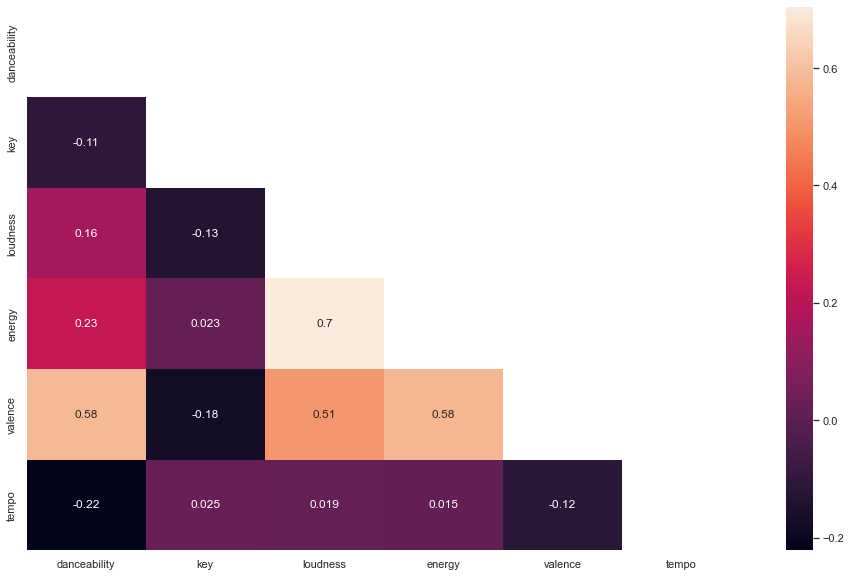

In [1595]:
mask = np.zeros_like(drock.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(16, 10))
corrMatrix = drock.corr()
sn.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()

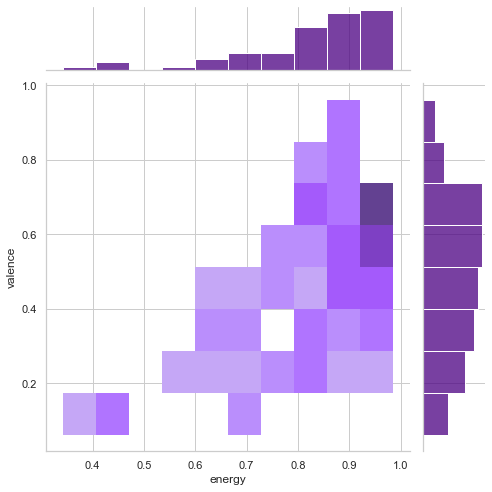

In [1596]:
sn.set_context('notebook')
sn.set_style('whitegrid')
sn.jointplot(x=rock['energy'], y=rock['valence'], height=7, color='indigo', kind='hist' , joint_kws={'alpha':1})
plt.show()

In [1597]:
x = rock[['energy']]
y = rock[['valence']]

In [1598]:
# Linear Regression
reg = LinearRegression()
reg.fit(x, y)
reg.predict(x)
print('Theta 0:', reg.intercept_[0])
print('Theta 1:', reg.coef_[0][0])
mse = mean_squared_error(y, reg.predict(x))
print('Mean squared error:', mse)

Theta 0: -0.2645471295902857
Theta 1: 0.9032548231283379
Mean squared error: 0.029682098373523255


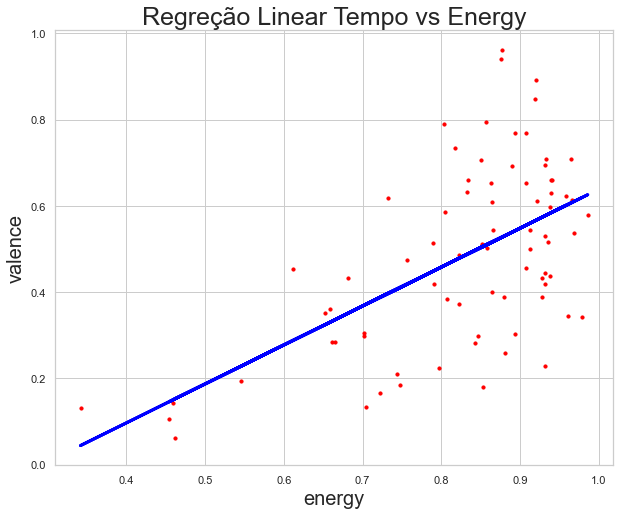

In [1599]:
fig = plt.figure(figsize=[10, 8])
plt.scatter(x, y, s=10, c='red')

plt.title('Regreção Linear Tempo vs Energy', fontsize=25)
plt.xlabel('energy', fontsize=20)
plt.ylabel('valence', fontsize=20)

plt.plot(x, reg.predict(x), c='blue', linewidth=3)
plt.show()

# Extração de dados e análise playlist de pagode #

In [1600]:
pagode = call_playlist("spotify","37i9dQZF1DXc4dYxgBQ1lf")

In [1601]:
dpagode = pagode[['danceability', 'key', 'loudness', 'energy', 'valence', 'tempo']]
dpagode = dpagode.apply(pd.to_numeric)

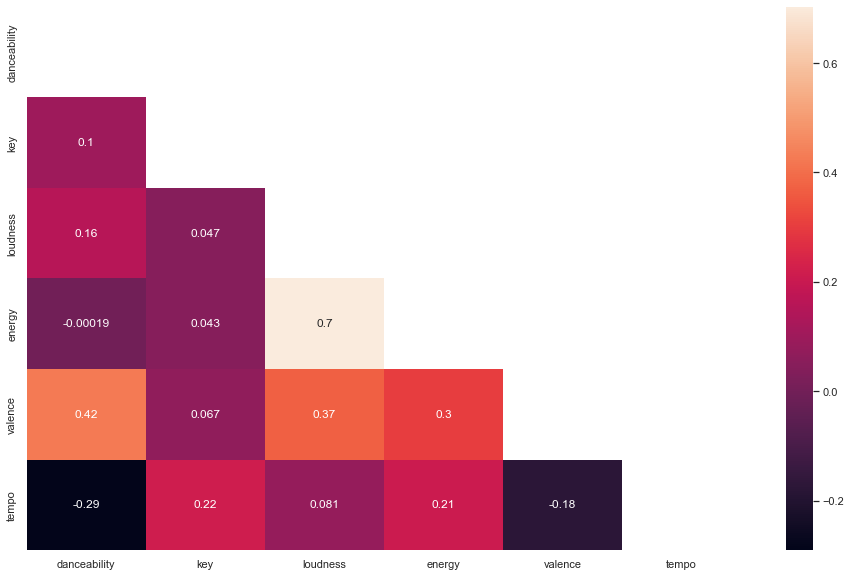

In [1602]:
mask = np.zeros_like(dpagode.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(16, 10))
corrMatrix = dpagode.corr()
sn.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()

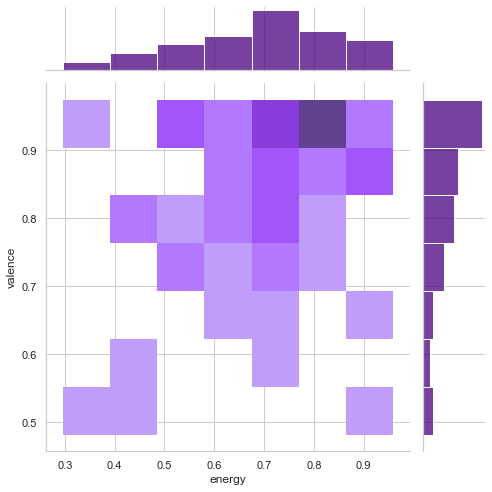

In [1603]:
sn.set_context('notebook')
sn.set_style('whitegrid')
sn.jointplot(x=pagode['energy'], y=pagode['valence'], height=7, color='indigo', kind='hist' , joint_kws={'alpha':1})
plt.show()

In [1604]:
x2 = funk[['energy']]
y2 = funk[['valence']]

In [1605]:
# Linear Regression
reg = LinearRegression()
reg.fit(x2, y2)
reg.predict(x2)
print('Theta 0:', reg.intercept_[0])
print('Theta 1:', reg.coef_[0][0])
mse = mean_squared_error(y2, reg.predict(x2))
print('Mean squared error:', mse)

Theta 0: 0.6384505236759256
Theta 1: 0.25534975667037635
Mean squared error: 0.015242867852722435


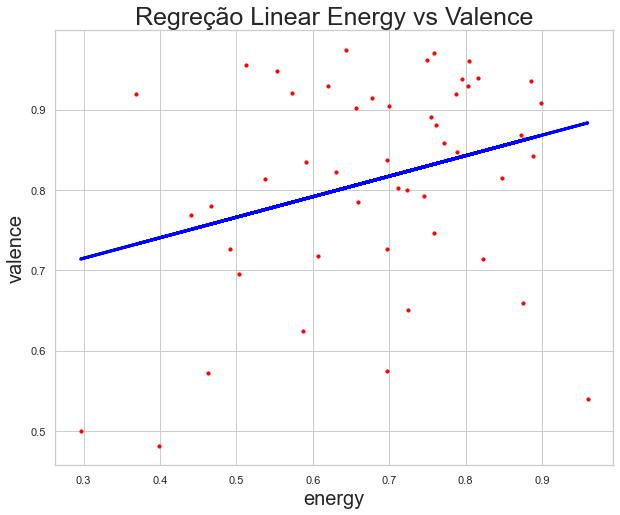

In [1606]:
fig = plt.figure(figsize=[10, 8])
plt.scatter(x2, y2, s=10, c='red')

plt.title('Regreção Linear Energy vs Valence', fontsize=25)
plt.ylabel('valence', fontsize=20)
plt.xlabel('energy', fontsize=20)

plt.plot(x2, reg.predict(x2), c='blue', linewidth=3)
plt.show()

# Junção dos dados #

In [1607]:
frames = [rock, funk]
results = pd.concat(frames)
results = results.reset_index(drop=True)
results

,artist,album,artist_id,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3 Doors Down,The Better Life,2RTUTCvo6onsAnheUk3aL9,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,0.545,0.865,11,-5.708,0,0.0286,0.000011,0.168,0.543,99.009,233933,4
1,Disturbed,The Sickness,3TOqt5oJwL9BE2NG9MEwDa,Down with the Sickness,40rvBMQizxkIqnjPdEWY1v,0.695,0.876,3,-4.262,0,0.0553,0.000007,0.106,0.941,89.954,279213,4
2,The Hives,Veni Vidi Vicious,4DToQR3aKrHQSSRzSz8Nzt,Hate To Say I Told You So,20j7B6mL9gnNvG3ic6Vwh5,0.459,0.931,5,-5.024,1,0.0612,0.00881,0.412,0.419,135.826,200693,4
3,Green Day,Warning,7oPftvlwr6VrsViSDV7fJY,Warning,0ue0gFLwvXd8qZIPg35Qiu,0.728,0.92,2,-2.828,1,0.0294,0.000016,0.199,0.892,120.989,221667,4
4,Fuel,Something Like Human,0EyuKHE1AeE9lWUF8mzKVp,Hemorrhage (In My Hands),1sjrDQXqAa9V07FjKIlAQ4,0.301,0.823,1,-4.072,1,0.0433,0.000309,0.0833,0.372,152.017,236867,4
5,Linkin Park,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,In the End,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3,-5.87,0,0.0584,0,0.209,0.4,105.143,216880,4
6,Limp Bizkit,Chocolate Starfish And The Hot Dog Flavored Water,165ZgPlLkK7bf5bDoFc6Sb,Take A Look Around,2avKuMN2QXkaG9vvHa2JLt,0.425,0.852,11,-5.607,1,0.046,0.306,0.0935,0.512,101.968,321040,4
7,Papa Roach,Infest,4RddZ3iHvSpGV4dvATac9X,Last Resort,5W8YXBz9MTIDyrpYaCg2Ky,0.589,0.89,4,-3.719,0,0.0603,0.00082,0.201,0.692,90.598,199907,4
8,The Offspring,Conspiracy Of One,5LfGQac0EIXyAN8aUwmNAQ,Want You Bad,6hwQ69v7VbPhTTR2fOtYX7,0.491,0.966,4,-4.28,1,0.0538,0,0.307,0.614,105.544,202573,4
9,Bon Jovi,Crush,58lV9VcRSjABbAbfWS6skp,It's My Life,0v1XpBHnsbkCn7iJ9Ucr1l,0.551,0.913,0,-4.063,0,0.0466,0.000013,0.347,0.544,119.992,224493,4


In [1608]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in results.artist_id:
    artist = sp.artist(a_id)
    artist_genres.append(artist['genres'])

In [1609]:
results = results.assign(artist_genres=artist_genres)
results['artist_genres_str'] = results['artist_genres'].astype('str')
idxName = results[results['artist_genres_str']=='[]'].index
results.drop(idxName, inplace=True)
results = results.reset_index(drop=True)

In [1610]:
results

,artist,album,artist_id,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genres,artist_genres_str
0,3 Doors Down,The Better Life,2RTUTCvo6onsAnheUk3aL9,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,0.545,0.865,11,-5.708,0,0.0286,0.000011,0.168,0.543,99.009,233933,4,"[alternative metal, nu metal, pop rock, post-g...","['alternative metal', 'nu metal', 'pop rock', ..."
1,Disturbed,The Sickness,3TOqt5oJwL9BE2NG9MEwDa,Down with the Sickness,40rvBMQizxkIqnjPdEWY1v,0.695,0.876,3,-4.262,0,0.0553,0.000007,0.106,0.941,89.954,279213,4,"[alternative metal, nu metal, rap metal]","['alternative metal', 'nu metal', 'rap metal']"
2,The Hives,Veni Vidi Vicious,4DToQR3aKrHQSSRzSz8Nzt,Hate To Say I Told You So,20j7B6mL9gnNvG3ic6Vwh5,0.459,0.931,5,-5.024,1,0.0612,0.00881,0.412,0.419,135.826,200693,4,"[alternative rock, garage rock, garage rock re...","['alternative rock', 'garage rock', 'garage ro..."
3,Green Day,Warning,7oPftvlwr6VrsViSDV7fJY,Warning,0ue0gFLwvXd8qZIPg35Qiu,0.728,0.92,2,-2.828,1,0.0294,0.000016,0.199,0.892,120.989,221667,4,"[permanent wave, punk]","['permanent wave', 'punk']"
4,Fuel,Something Like Human,0EyuKHE1AeE9lWUF8mzKVp,Hemorrhage (In My Hands),1sjrDQXqAa9V07FjKIlAQ4,0.301,0.823,1,-4.072,1,0.0433,0.000309,0.0833,0.372,152.017,236867,4,"[alternative metal, alternative rock, nu metal...","['alternative metal', 'alternative rock', 'nu ..."
5,Linkin Park,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,In the End,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3,-5.87,0,0.0584,0,0.209,0.4,105.143,216880,4,"[alternative metal, nu metal, post-grunge, rap...","['alternative metal', 'nu metal', 'post-grunge..."
6,Limp Bizkit,Chocolate Starfish And The Hot Dog Flavored Water,165ZgPlLkK7bf5bDoFc6Sb,Take A Look Around,2avKuMN2QXkaG9vvHa2JLt,0.425,0.852,11,-5.607,1,0.046,0.306,0.0935,0.512,101.968,321040,4,"[alternative metal, funk metal, nu metal, rap ...","['alternative metal', 'funk metal', 'nu metal'..."
7,Papa Roach,Infest,4RddZ3iHvSpGV4dvATac9X,Last Resort,5W8YXBz9MTIDyrpYaCg2Ky,0.589,0.89,4,-3.719,0,0.0603,0.00082,0.201,0.692,90.598,199907,4,"[alternative metal, nu metal, rap metal, rap r...","['alternative metal', 'nu metal', 'rap metal',..."
8,The Offspring,Conspiracy Of One,5LfGQac0EIXyAN8aUwmNAQ,Want You Bad,6hwQ69v7VbPhTTR2fOtYX7,0.491,0.966,4,-4.28,1,0.0538,0,0.307,0.614,105.544,202573,4,"[alternative metal, permanent wave, punk, rock...","['alternative metal', 'permanent wave', 'punk'..."
9,Bon Jovi,Crush,58lV9VcRSjABbAbfWS6skp,It's My Life,0v1XpBHnsbkCn7iJ9Ucr1l,0.551,0.913,0,-4.063,0,0.0466,0.000013,0.347,0.544,119.992,224493,4,"[glam metal, rock]","['glam metal', 'rock']"


In [1611]:
dx = results[['energy', 'valence']]

## Calculando a quantidade de clusters ##

In [1612]:
def calcular_wcss(dp):
  wcss = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dp)
    wcss.append(kmeans.inertia_)
  return wcss

In [1613]:
wcss = calcular_wcss(dx)

In [1614]:
for i in range(len(wcss)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss[i]}')

O cluster 0 possui valor de WCSS de: 9.440973545350877
O cluster 1 possui valor de WCSS de: 4.23386063395
O cluster 2 possui valor de WCSS de: 2.6409800563127397
O cluster 3 possui valor de WCSS de: 2.0120825105189253
O cluster 4 possui valor de WCSS de: 1.5139208224955434
O cluster 5 possui valor de WCSS de: 1.1797635154678363
O cluster 6 possui valor de WCSS de: 1.0164269954343434
O cluster 7 possui valor de WCSS de: 0.8700317045955204
O cluster 8 possui valor de WCSS de: 0.7613144594083547
O cluster 9 possui valor de WCSS de: 0.6943880760131125


In [1615]:
grafico_wcss = px.line(x = range(1,11), y=wcss_clientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando o WCSS', xaxis_title='Numero de Clusters', 
                  yaxis_title='Valor do WCSS', template = 'plotly_white')

## Treinamento ##

In [1616]:
kmeans_musicas = KMeans(n_clusters=3, random_state=0)
results['cluster'] = kmeans_clientes.fit_predict(dx)

In [1617]:
final_results = results[['tempo', 'energy', 'artist_genres', 'cluster']]

## Calculando os centroides ##

In [1618]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[0.68474074, 0.26434444],
       [0.89704545, 0.55070455],
       [0.75553488, 0.85511628]])

## Grafico ##

In [1619]:
grafico = px.scatter(x = results['energy'], y = results['valence'],
                     color= results['cluster'], )

grafico_centroide = px.scatter(x = centroides_clusters[:,0], 
                               y = centroides_clusters[:,1], size=[10, 10, 10])

grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [1620]:
track_sample.sort_values(by=['cluster'])

,tempo,energy,artist_genres,cluster
56,165.253,0.932,"[alternative metal, alternative rock, el paso ...",0
61,173.372,0.661,"[permanent wave, pop]",0
40,111.324,0.722,"[alternative metal, funk metal, nu metal, rap ...",0
21,97.051,0.843,"[pop punk, punk, ska, ska punk, skate punk, so...",0
22,105.076,0.702,"[alternative metal, nu metal, post-grunge, rap...",0
59,139.986,0.881,"[ccm, christian alternative rock, christian mu...",0
26,82.305,0.894,"[alternative metal, alternative rock, nu metal...",0
63,117.987,0.797,"[alternative metal, nu metal, rap metal, rock,...",0
27,159.541,0.459,"[australian alternative rock, australian pop, ...",0
54,109.933,0.659,"[neo mellow, pop rock, post-grunge]",0
